Stable diffusion model


In [2]:
!pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.7 MB/s eta 0:00:00


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 75.2 MB/s eta 0:00:00


In [4]:
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 18.2 MB/s eta 0:00:00


In [ ]:
from PIL import Image
img = Image.open("sheep.png")
img.show()

NameError: ignored

In [5]:
import torch
from diffusers import StableDiffusionPipeline

def generate_image(prompt):
  model_id = "CompVis/stable-diffusion-v1-4"
  device = "cuda"
 

  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
  pipe = pipe.to(device)
  image = pipe(prompt).images[0]  
  image.show()
  #image.save("astronaut_rides_horse.png")


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

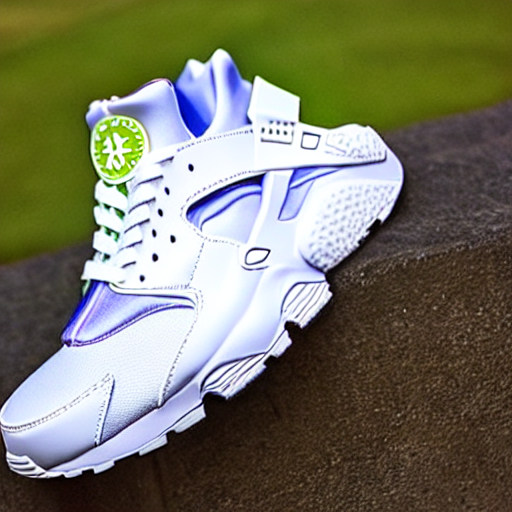

In [ ]:
generate_image('''
A good looking white nike huarache with bright colors sprankled on the white texture 
''')

In [10]:
import torch
from diffusers import StableDiffusionPipeline

def generate_images_pre(prompt, seed):
  model_id = "CompVis/stable-diffusion-v1-4"
  device = "cuda"
  torch.manual_seed(seed)

  pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
  pipe = pipe.to(device)
  image = pipe(prompt).images[0]  
  image.show()
  #image.save("astronaut_rides_horse.png")
  image.save("carthage.png")


In [11]:
def generate_images(prompt):
  for i in range(10):     
     generate_images_pre(prompt, i)

In [ ]:
generate_images("Carthage landscape and city 2023")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

# Inference with DALLE-Mini

In this tutorial, we use DALLE-mini to generate images from a prompt of our choosing.

In [ ]:
!pip install min-dalle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for min-dalle: filename=min_dalle-0.3.16-py3-none-any.whl size=10422 sha256=e3a26c787e8442b80a8dc342267d9e151206c662f4ec43ec3bc3e214d2381466
  Stored in directory: /root/.cache/pip/wheels/f9/fc/fd/167ab3244ea51fe161b3b5eecac5dc4aecf5e5dc6a35b9f465
Successfully built min-dalle


In [ ]:
from IPython.display import display, update_display # we use this to show images.
import torch
from min_dalle import MinDalle # dalle mini library

In [ ]:
model = MinDalle(
    dtype=torch.float16, # float16 is faster than float32, though float32 will generate better images
    device = 'cuda',
    is_mega = False, # we are using the small model, for faster inference
    is_reusable=True
)
# It might take some time to initialize the model. For the mega model, it takes around 2 minutes to initialize in a colab environment.
# I will be back when the model is finished initializing.

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 12.5 MB/s eta 0:00:00


In [ ]:
# parameters
text = "Wall-e by Dali"
progressive_outputs = True # It will keep generating and improving the images
seamless = True
grid_size = 3 # generates 3x3 grid of images
temperature = 2
supercondition_factor = 16
top_k = 128

In [ ]:
image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size = grid_size,
    progressive_outputs = progressive_outputs,
    is_seamless = seamless,
    temperature=temperature,
    top_k = int(top_k),
    supercondition_factor = supercondition_factor,
)

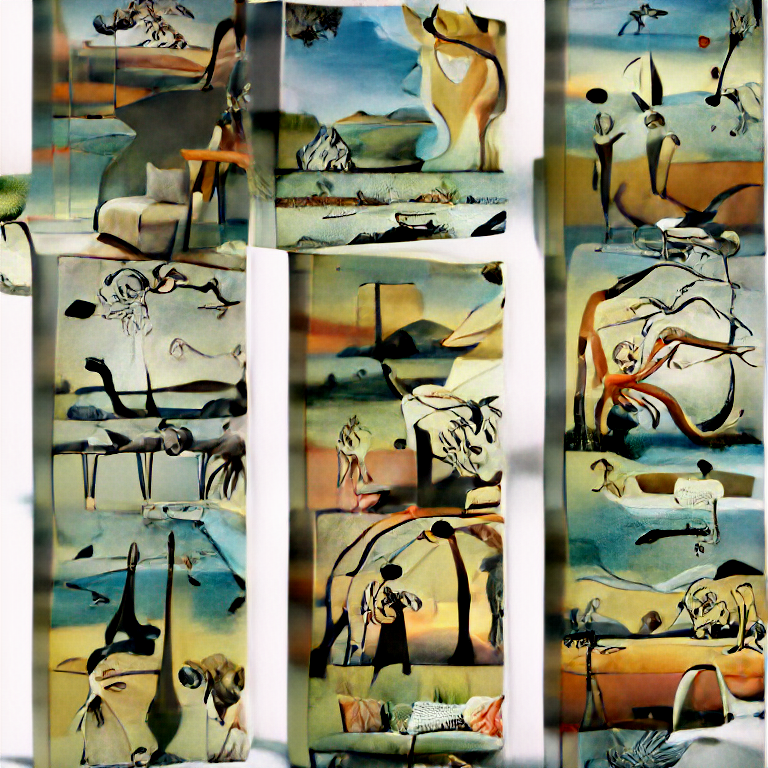

In [ ]:
# display the images
is_first = True
for image in image_stream:
  display_func = display if is_first else update_display # We either display the images if there is no output, otherwise, we just refresh with new iamges
  display_func(image, display_id=1)
  is_first = False # subsquent iterations will use update_display

In [ ]:
# settitng is_mega to true can result in much more accurate images.
# playing around with the wording of the prompt can also result in better images, along with changing the parameters.
# That's it for this video see you next time.